# Two Way ANOVA

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.stats.multicomp import MultiComparison


In [2]:
# create a dataset

df = pd.DataFrame({'water':np.repeat(['daily','weekly'],15),
                    'sun': np.tile(np.repeat(['low','medium','high'],5),2),
                    'height':[6,6,6,5,6,5,5,6,4,5,
                              6,6,7,8,7,3,4,4,4,5,
                              4,4,4,4,4,5,6,6,7,8]})
df.sample(10)

,water,sun,height
23,weekly,medium,4
17,weekly,low,4
28,weekly,high,7
8,daily,medium,4
9,daily,medium,5
19,weekly,low,5
26,weekly,high,6
24,weekly,medium,4
2,daily,low,6
16,weekly,low,4


C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

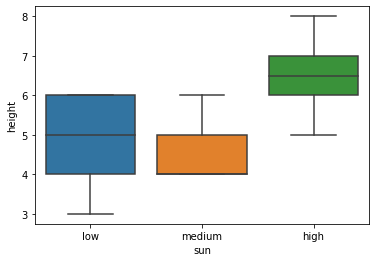

In [3]:
# one way anova with respect to sun  because of one variables
sns.boxplot(df['sun'],df['height'])

C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

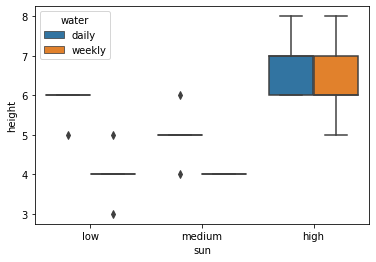

In [4]:
# two way anova with respect to sun and water because of two variables
sns.boxplot(df['sun'],df['height'], hue=df['water'])

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# oneway ANOVA
model = ols('height ~ sun', data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


In [6]:
# Two-way ANOVA
# C(water or sun) individual effect on height
# C(sun):C(water) interactive effect on height
model = ols('height ~ C(sun) + C(water) + C(sun):C(water)', data=df).fit()
sm.stats.anova_lm(model,type=2)
# as PR<0.05 so these have effect on it

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(sun):C(water),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN


In [7]:
# another way of doing this (two way anova)
import pingouin as pg
aov = pg.anova(data=df,dv='height',between=['sun','water'],detailed=True)
print(aov)


        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


In [8]:
# tukey test kaisay lagana hy two way anova per?
# lettering or grouping kaisay karni hai?
# Annotation kaisay karni hy graphs main?

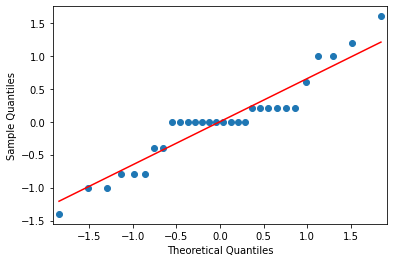

In [9]:
# qq norm plot
res = model.resid
fig = sm.qqplot(res,line='s')
plt.show()
# to get residual error

In [13]:
pip install lxml

     ---------------------------------------- 3.6/3.6 MB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.stats.multicomp import MultiComparison


In [16]:
df['2'] = df['sun'].map(
    str) + " + " + df['water'].map(str)

pt = pg.pairwise_tukey(data=df, dv='height', between='2')
print(pt)


                 A                B  mean(A)  mean(B)  diff       se  \
0     high + daily    high + weekly      6.8      6.4   0.4  0.46188   
1     high + daily      low + daily      6.8      5.8   1.0  0.46188   
2     high + daily     low + weekly      6.8      4.0   2.8  0.46188   
3     high + daily   medium + daily      6.8      5.0   1.8  0.46188   
4     high + daily  medium + weekly      6.8      4.0   2.8  0.46188   
5    high + weekly      low + daily      6.4      5.8   0.6  0.46188   
6    high + weekly     low + weekly      6.4      4.0   2.4  0.46188   
7    high + weekly   medium + daily      6.4      5.0   1.4  0.46188   
8    high + weekly  medium + weekly      6.4      4.0   2.4  0.46188   
9      low + daily     low + weekly      5.8      4.0   1.8  0.46188   
10     low + daily   medium + daily      5.8      5.0   0.8  0.46188   
11     low + daily  medium + weekly      5.8      4.0   1.8  0.46188   
12    low + weekly   medium + daily      4.0      5.0  -1.0  0.4